<a href="https://colab.research.google.com/github/KaushikiTiwary/Predicting-Bankruptcy/blob/main/Final_Fintech_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Non Bankrupt Data Load

In [1]:
from google.colab import files
uploaded = files.upload()

Saving zvei35wzg5ry6rid.csv to zvei35wzg5ry6rid.csv


In [182]:
import pandas as pd

non_bankrupt_df = pd.read_csv('/content/zvei35wzg5ry6rid.csv')  # change to your file name
non_bankrupt_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,act,at,csho,ebit,lct,lt,sale,seq,costat,prcc_f,sic
0,1004,1966-05-31,1965,INDL,C,D,STD,AIR,USD,2.066,2.519,0.420,0.680,0.923,1.091,3.821,1.428,A,NaN,5080
1,1004,1967-05-31,1966,INDL,C,D,STD,AIR,USD,3.007,3.954,0.520,0.575,1.023,1.371,4.654,2.583,A,NaN,5080
2,1004,1968-05-31,1967,INDL,C,D,STD,AIR,USD,3.453,4.880,0.554,0.093,1.082,2.110,4.610,2.771,A,12.624987,5080
3,1004,1969-05-31,1968,INDL,C,D,STD,AIR,USD,7.334,10.402,0.688,0.816,3.835,5.659,9.956,4.744,A,19.749983,5080
4,1004,1970-05-31,1969,INDL,C,D,STD,AIR,USD,8.226,11.584,0.729,0.896,4.576,6.436,15.705,5.148,A,11.124989,5080


In [183]:
columns_to_keep = [
    'tic', 'fyear', 'act', 'lct', 'at', 'seq',
    'ebit', 'sale', 'lt', 'prcc_f', 'csho', 'sic'
]

In [184]:
non_bankrupt_df = non_bankrupt_df[columns_to_keep]

In [185]:
print(non_bankrupt_df.columns)

Index(['tic', 'fyear', 'act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt',
       'prcc_f', 'csho', 'sic'],
      dtype='object')


In [186]:
non_bankrupt_df['sic'].unique()

array([5080, 4512, 3564, 6799, 4911, 6141, 3845, 7370, 6351, 3420, 3663,
       6726, 3674, 3559, 1040, 2810, 4513, 4924, 4400, 6798,  100, 5500,
       9997, 6722, 1311, 7510, 2670, 7340, 6311, 6321, 6331, 6512, 8090,
       7372, 2870, 3823, 2836, 3312, 6552, 5150, 1381, 3442, 3533, 2070,
       4213, 5065, 3523, 2820, 3577, 3640, 1000, 2860, 7374, 2844, 3470,
       2111, 3824, 3411, 6020, 2511, 3841, 9995, 3569, 2330, 3677, 4812,
       5731, 3826, 4923, 7200, 6500, 3721, 7363, 3990, 6200, 2013, 2834,
       2911, 4813, 2085, 5661, 3510, 3330, 3661, 3711, 4011, 1623, 7373,
       8741, 3490, 6324, 3670, 2890, 5621,  800, 2086, 4941, 2030, 2082,
       6519, 5122, 2950, 5412, 3531, 2452, 3678, 6792, 3555, 8082, 3452,
       5812, 2840, 7990, 4931, 4832, 3310, 2842, 7812, 3825, 6411, 4841,
       6199, 2000, 6794, 6513, 3851, 3679, 2211, 3728, 3714,  700, 1382,
       5331, 6153, 2780, 8200, 3621, 5190, 3578, 5311, 4888, 2273, 7311,
       7323, 3561, 3827, 3861, 3620, 3651, 2761, 30

In [187]:
sic_to_industry_custom = {
    # ✅ Healthcare
    8011: 'Healthcare', 8021: 'Healthcare', 8051: 'Healthcare', 8062: 'Healthcare',
    2834: 'Healthcare', 3841: 'Healthcare', 3826: 'Healthcare', 3829: 'Healthcare',
    2833: 'Healthcare', 3845: 'Healthcare',

    # ✅ Finance & Banking
    6020: 'Finance & Banking', 6021: 'Finance & Banking', 6035: 'Finance & Banking',
    6036: 'Finance & Banking', 6111: 'Finance & Banking', 6141: 'Finance & Banking',

    # ✅ Tech
    3571: 'Tech', 3674: 'Tech', 7370: 'Tech', 7371: 'Tech', 7372: 'Tech', 7373: 'Tech',
    7374: 'Tech', 3577: 'Tech', 3572: 'Tech', 5045: 'Tech', 5065: 'Tech',

    # ✅ Manufacturing
    3711: 'Manufacturing', 3721: 'Manufacturing', 3761: 'Manufacturing', 3841: 'Manufacturing',
    3441: 'Manufacturing', 3561: 'Manufacturing', 2833: 'Manufacturing',

    # ✅ Retail
    5411: 'Retail', 5331: 'Retail', 5311: 'Retail', 5999: 'Retail', 5621: 'Retail',

    # ✅ Energy, Oil & Gas
    1311: 'Energy, Oil & Gas', 1389: 'Energy, Oil & Gas', 2911: 'Energy, Oil & Gas',
    4922: 'Energy, Oil & Gas', 4932: 'Energy, Oil & Gas', 4931: 'Energy, Oil & Gas',

    # ✅ Misc/Other
    2836: 'Chemicals', 2040: 'Consumer Products', 2086: 'Consumer Products',
}

In [188]:
non_bankrupt_df['industry'] = non_bankrupt_df['sic'].map(sic_to_industry_custom)

In [189]:
non_bankrupt_df['industry'].value_counts(dropna=False)

,count
industry,
NaN,131592
Tech,13964
Finance & Banking,12905
"Energy, Oil & Gas",8224
Healthcare,7316
Chemicals,7238
Manufacturing,2948
Retail,1139
Consumer Products,850


<ipython-input-190-29284a3232b3>:25: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


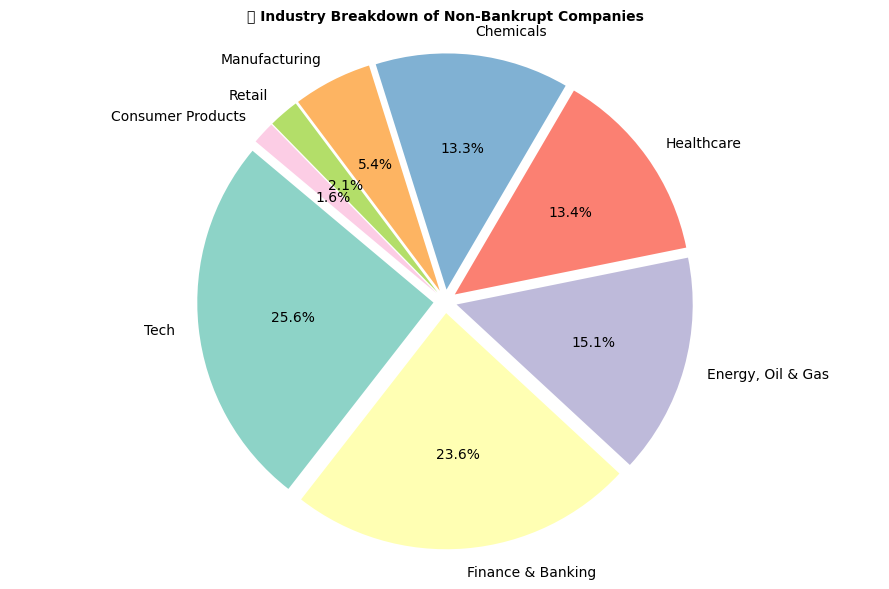

In [190]:
#Piechart to see the industries breakdown

import matplotlib.pyplot as plt

# Calculate counts
industry_counts = non_bankrupt_df['industry'].value_counts()

plt.figure(figsize=(9, 6))
colors = plt.cm.Set3(range(len(industry_counts)))
explode = [0.05]*len(industry_counts)

# Plot
plt.pie(
    industry_counts,
    labels=industry_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 10}
)

plt.title('🧩 Industry Breakdown of Non-Bankrupt Companies', fontsize=10, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [191]:
non_bankrupt_df = non_bankrupt_df.dropna(subset=['industry'])

In [192]:
non_bankrupt_df.isnull().sum()

,0
tic,4
fyear,0
act,14402
lct,14300
at,1356
seq,2157
ebit,2309
sale,1515
lt,1863
prcc_f,7112


In [193]:
non_bankrupt_df = non_bankrupt_df.dropna()

In [194]:
non_bankrupt_df.groupby('industry')['tic'].nunique().sort_values(ascending=False)

,tic
industry,
Tech,945
Chemicals,666
Healthcare,478
"Energy, Oil & Gas",298
Manufacturing,154
Retail,40
Consumer Products,38
Finance & Banking,11


In [195]:
healthcare_non_bankrupt = non_bankrupt_df[non_bankrupt_df['industry'] == 'Healthcare']

In [196]:
#healthcare non_bankrupt

# Calculate individual Z-Score components
healthcare_non_bankrupt['X1'] = (healthcare_non_bankrupt['act'] - healthcare_non_bankrupt['lct']) / healthcare_non_bankrupt['at'] # Working Capital / Total Assets
healthcare_non_bankrupt['X2'] = healthcare_non_bankrupt['seq'] / healthcare_non_bankrupt['at']                          # Retained Earnings / Total Assets
healthcare_non_bankrupt['X3'] = healthcare_non_bankrupt['ebit'] / healthcare_non_bankrupt['at']                         # EBIT / Total Assets
healthcare_non_bankrupt['X4'] = (healthcare_non_bankrupt['prcc_f'] * healthcare_non_bankrupt['csho']) / healthcare_non_bankrupt['lt'] # Market Value of Equity / Total Liabilities
healthcare_non_bankrupt['X5'] = healthcare_non_bankrupt['sale'] / healthcare_non_bankrupt['at']                         # Sales / Total Assets
healthcare_non_bankrupt.head()

<ipython-input-196-73df8194e1c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_non_bankrupt['X1'] = (healthcare_non_bankrupt['act'] - healthcare_non_bankrupt['lct']) / healthcare_non_bankrupt['at'] # Working Capital / Total Assets
<ipython-input-196-73df8194e1c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_non_bankrupt['X2'] = healthcare_non_bankrupt['seq'] / healthcare_non_bankrupt['at']                          # Retained Earnings / Total Assets
<ipython-input-196-73df8194e1c

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
374,ABT,1963,102.3,42.965,178.9,123.013,34.938,158.648,55.887,123.999939,4.016,3845,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797
375,ABT,1964,116.1,45.346,209.4,151.605,43.830,212.586,57.795,47.000000,13.183,3845,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215
376,ABT,1965,116.7,48.850,223.7,162.675,45.340,236.800,61.025,47.499969,13.184,3845,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561
377,ABT,1966,128.8,54.185,249.4,179.648,49.086,265.804,69.752,46.000000,13.282,3845,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774
378,ABT,1967,143.1,60.096,288.9,195.297,52.279,303.341,93.603,47.000000,13.364,3845,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986


In [197]:
healthcare_non_bankrupt

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
374,ABT,1963,102.300,42.965,178.900,123.013,34.938,158.648,55.887,123.999939,4.016,3845,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797
375,ABT,1964,116.100,45.346,209.400,151.605,43.830,212.586,57.795,47.000000,13.183,3845,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215
376,ABT,1965,116.700,48.850,223.700,162.675,45.340,236.800,61.025,47.499969,13.184,3845,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561
377,ABT,1966,128.800,54.185,249.400,179.648,49.086,265.804,69.752,46.000000,13.282,3845,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774
378,ABT,1967,143.100,60.096,288.900,195.297,52.279,303.341,93.603,47.000000,13.364,3845,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186145,QNRX,2022,13.370,3.528,14.458,7.407,-9.257,0.000,7.051,1.420000,4.847,2834,Healthcare,0.680730,0.512312,-0.640268,0.976137,0.000000
186146,QNRX,2023,11.286,3.581,12.169,5.664,-9.379,0.000,6.505,4.905000,0.987,2834,Healthcare,0.633166,0.465445,-0.770729,0.744233,0.000000
186147,QNRX,2024,14.926,4.181,15.709,9.205,-9.528,0.000,6.504,0.650700,8.948,2834,Healthcare,0.684003,0.585970,-0.606531,0.895213,0.000000
186163,HLN,2022,4890.689,5265.413,41948.594,19677.222,2913.448,13082.804,22119.555,8.000000,4617.287,2834,Healthcare,-0.008933,0.469079,0.069453,1.669938,0.311877


#Bankrupt Data

In [72]:
from google.colab import files
uploaded = files.upload()

Saving p7dnt9mjsnf8kb0g.csv to p7dnt9mjsnf8kb0g (2).csv


In [198]:
import pandas as pd

bankrupt_df = pd.read_csv('/content/p7dnt9mjsnf8kb0g.csv')
bankrupt_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,act,at,csho,dltt,ebit,lct,sale,seq,costat,prcc_f,sic
0,1000,1961-12-31,1961,INDL,C,D,STD,AE.2,USD,NaN,NaN,0.152,0.100,NaN,NaN,0.900,NaN,I,NaN,3089
1,1000,1962-12-31,1962,INDL,C,D,STD,AE.2,USD,NaN,NaN,0.181,0.000,NaN,NaN,1.600,NaN,I,NaN,3089
2,1000,1963-12-31,1963,INDL,C,D,STD,AE.2,USD,0.408,NaN,0.186,0.015,0.000,0.322,1.457,0.553,I,NaN,3089
3,1000,1964-12-31,1964,INDL,C,D,STD,AE.2,USD,0.718,1.416,0.196,0.522,0.074,0.267,2.032,0.607,I,NaN,3089
4,1000,1965-12-31,1965,INDL,C,D,STD,AE.2,USD,0.725,2.310,0.206,1.154,-0.242,0.623,1.688,0.491,I,NaN,3089


In [199]:
columns_to_keep = [
    'tic', 'fyear', 'act', 'lct', 'at', 'seq',
    'ebit', 'sale', 'dltt', 'prcc_f', 'csho', 'sic'
]

In [200]:
bankrupt_df = bankrupt_df[columns_to_keep]

In [201]:
bankrupt_df['sic'].unique()

array([3089, 5812, 3825, 5712, 3724, 2711, 3652, 3577, 3460, 3743, 4841,
       3357, 3661, 6512, 3678, 3585, 3812, 3861, 7380, 3211, 3844, 3714,
       5045, 4522, 5040, 8062, 3330, 7385, 6794, 7990, 3990, 2030, 3580,
       2834, 3443, 3663, 7830, 2300, 3949, 2520, 3612, 2011, 7372, 8711,
       4922, 3670, 6798, 7373, 3571, 5010, 3823, 5900, 4832, 8741, 7389,
       7900, 3578, 3523, 5311, 3060, 6792, 8700, 5600, 4955, 1311, 3690,
       7370, 2780, 1389, 5160, 4833, 3420, 3560, 3559, 3433, 5070, 5020,
       3944, 7310, 3442, 5912, 2250, 5172, 3679, 2731, 2890, 7363, 3572,
       4210, 7374, 3651, 5030, 3490, 3672, 6099, 3412, 4953, 1381, 7359,
       7812, 2750, 6211, 3730, 3842, 3440, 5084, 5080, 3721, 3826, 3728,
       3430, 4813, 9995, 3080, 5047, 6159, 6324, 6020, 6552, 4899, 3713,
       6500, 6035, 5013, 2253,  200, 4512, 3537, 4731, 3452, 4513, 2810,
       2840, 2820, 1220, 4911, 4950, 7350, 1040, 1600, 3841, 2221, 2451,
       2844, 5411, 6799, 3350, 2870, 5122, 2273, 51

In [202]:
sic_to_industry_custom = {
    # ✅ Healthcare
    8011: 'Healthcare', 8021: 'Healthcare', 8051: 'Healthcare', 8062: 'Healthcare',
    2834: 'Healthcare', 3841: 'Healthcare', 3826: 'Healthcare', 3829: 'Healthcare',
    2833: 'Healthcare', 3845: 'Healthcare', 8090: 'Healthcare', 8082: 'Healthcare',
    8071: 'Healthcare', 8060: 'Healthcare', 8050: 'Healthcare', 8040: 'Healthcare',
    8000: 'Healthcare',

    # ✅ Finance & Banking
    6020: 'Finance & Banking', 6021: 'Finance & Banking', 6035: 'Finance & Banking',
    6036: 'Finance & Banking', 6111: 'Finance & Banking', 6141: 'Finance & Banking',
    6153: 'Finance & Banking', 6159: 'Finance & Banking', 6162: 'Finance & Banking',
    6163: 'Finance & Banking', 6200: 'Finance & Banking',

    # ✅ Tech
    3571: 'Tech', 3674: 'Tech', 7370: 'Tech', 7371: 'Tech', 7372: 'Tech', 7373: 'Tech',
    7374: 'Tech', 3577: 'Tech', 3572: 'Tech', 5045: 'Tech', 5065: 'Tech', 3670: 'Tech',
    3677: 'Tech', 3679: 'Tech', 3663: 'Tech', 3661: 'Tech', 3669: 'Tech', 3660: 'Tech',
    3652: 'Tech', 3651: 'Tech', 3576: 'Tech', 3570: 'Tech', 3575: 'Tech', 3578: 'Tech',
    3579: 'Tech', 3613: 'Tech',

    # ✅ Manufacturing
    3711: 'Manufacturing', 3721: 'Manufacturing', 3761: 'Manufacturing', 3841: 'Manufacturing',
    3441: 'Manufacturing', 3561: 'Manufacturing', 2833: 'Manufacturing', 3728: 'Manufacturing',
    3714: 'Manufacturing', 3713: 'Manufacturing', 3720: 'Manufacturing', 3760: 'Manufacturing',
    3730: 'Manufacturing', 3743: 'Manufacturing', 3751: 'Manufacturing', 3715: 'Manufacturing',

    # ✅ Retail
    5411: 'Retail', 5331: 'Retail', 5311: 'Retail', 5999: 'Retail', 5621: 'Retail',
    5731: 'Retail', 5412: 'Retail', 5990: 'Retail', 5600: 'Retail', 5661: 'Retail',

    # ✅ Energy, Oil & Gas
    1311: 'Energy, Oil & Gas', 1389: 'Energy, Oil & Gas', 2911: 'Energy, Oil & Gas',
    4922: 'Energy, Oil & Gas', 4932: 'Energy, Oil & Gas', 4931: 'Energy, Oil & Gas',
    1381: 'Energy, Oil & Gas', 4923: 'Energy, Oil & Gas', 4924: 'Energy, Oil & Gas',

    # ✅ Chemicals
    2836: 'Chemicals', 2844: 'Chemicals', 2840: 'Chemicals', 2810: 'Chemicals',
    2820: 'Chemicals', 2821: 'Chemicals', 2835: 'Chemicals', 2860: 'Chemicals',

    # ✅ Consumer Products
    2040: 'Consumer Products', 2086: 'Consumer Products', 2082: 'Consumer Products',
    2080: 'Consumer Products', 2084: 'Consumer Products', 2085: 'Consumer Products',

    # ✅ Transportation
    4512: 'Transportation', 4513: 'Transportation', 4522: 'Transportation',

    # ✅ Utilities
    4911: 'Utilities', 4931: 'Utilities', 4932: 'Utilities', 4941: 'Utilities', 4922: 'Utilities'
}

In [203]:
bankrupt_df['industry'] = bankrupt_df['sic'].map(sic_to_industry_custom)

In [204]:
bankrupt_df['industry'].value_counts(dropna=False)

,count
industry,
NaN,191936
Tech,41841
Finance & Banking,24984
"Energy, Oil & Gas",16051
Healthcare,15121
Chemicals,10702
Manufacturing,8421
Retail,8218
Utilities,7269


In [205]:
bankrupt_df.head()

,tic,fyear,act,lct,at,seq,ebit,sale,dltt,prcc_f,csho,sic,industry
0,AE.2,1961,NaN,NaN,NaN,NaN,NaN,0.900,0.100,NaN,0.152,3089,NaN
1,AE.2,1962,NaN,NaN,NaN,NaN,NaN,1.600,0.000,NaN,0.181,3089,NaN
2,AE.2,1963,0.408,0.322,NaN,0.553,0.000,1.457,0.015,NaN,0.186,3089,NaN
3,AE.2,1964,0.718,0.267,1.416,0.607,0.074,2.032,0.522,NaN,0.196,3089,NaN
4,AE.2,1965,0.725,0.623,2.310,0.491,-0.242,1.688,1.154,NaN,0.206,3089,NaN


In [206]:
bankrupt_df = bankrupt_df.dropna()

In [207]:
bankrupt_df.isnull().sum()

,0
tic,0
fyear,0
act,0
lct,0
at,0
seq,0
ebit,0
sale,0
dltt,0
prcc_f,0


In [96]:
bankrupt_df

,tic,fyear,act,lct,at,seq,ebit,sale,dltt,prcc_f,csho,sic,industry
71,4135B,1979,4.973,3.699,7.554,3.155,-0.494,8.106,0.000,1.75,1.251,3652,Tech
72,4135B,1980,5.296,3.548,7.199,2.973,-0.281,9.262,0.000,1.75,1.164,3652,Tech
73,4135B,1981,3.091,3.034,5.271,1.891,-1.697,7.261,0.000,0.75,1.138,3652,Tech
74,4135B,1982,2.832,2.914,4.877,1.896,-0.015,4.993,0.000,0.50,1.130,3652,Tech
75,4135B,1983,2.075,3.113,3.974,0.833,-1.158,3.839,0.000,0.50,1.121,3652,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328924,PGRU,2022,244.156,66.508,551.436,473.025,-13.207,101.372,6.219,4.31,161.960,7370,Tech
328925,PGRU,2023,244.114,72.802,540.316,458.223,-3.055,113.746,4.055,3.34,163.931,7370,Tech
328932,FSTX,2020,26.065,16.977,63.609,42.994,-18.185,11.256,2.622,9.87,9.100,2836,Chemicals
328933,FSTX,2021,84.739,12.135,123.021,96.857,-30.714,21.167,12.328,5.02,20.875,2836,Chemicals


In [208]:
bankrupt_df.groupby('industry')['tic'].nunique().sort_values(ascending=False)

,tic
industry,
Tech,3442
Healthcare,1155
"Energy, Oil & Gas",1055
Chemicals,808
Manufacturing,491
Retail,429
Utilities,148
Consumer Products,140
Transportation,112


In [209]:
bankrupt_df

,tic,fyear,act,lct,at,seq,ebit,sale,dltt,prcc_f,csho,sic,industry
71,4135B,1979,4.973,3.699,7.554,3.155,-0.494,8.106,0.000,1.75,1.251,3652,Tech
72,4135B,1980,5.296,3.548,7.199,2.973,-0.281,9.262,0.000,1.75,1.164,3652,Tech
73,4135B,1981,3.091,3.034,5.271,1.891,-1.697,7.261,0.000,0.75,1.138,3652,Tech
74,4135B,1982,2.832,2.914,4.877,1.896,-0.015,4.993,0.000,0.50,1.130,3652,Tech
75,4135B,1983,2.075,3.113,3.974,0.833,-1.158,3.839,0.000,0.50,1.121,3652,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328924,PGRU,2022,244.156,66.508,551.436,473.025,-13.207,101.372,6.219,4.31,161.960,7370,Tech
328925,PGRU,2023,244.114,72.802,540.316,458.223,-3.055,113.746,4.055,3.34,163.931,7370,Tech
328932,FSTX,2020,26.065,16.977,63.609,42.994,-18.185,11.256,2.622,9.87,9.100,2836,Chemicals
328933,FSTX,2021,84.739,12.135,123.021,96.857,-30.714,21.167,12.328,5.02,20.875,2836,Chemicals


In [210]:
#count of unique comapnies in industries
unique_companies_by_industry = bankrupt_df.groupby('industry')['tic'].nunique()
print(unique_companies_by_industry)

industry
Chemicals             808
Consumer Products     140
Energy, Oil & Gas    1055
Finance & Banking      97
Healthcare           1155
Manufacturing         491
Retail                429
Tech                 3442
Transportation        112
Utilities             148
Name: tic, dtype: int64


In [53]:
#!pip install wrds

In [54]:
# import wrds

# # Connect to WRDS (first time it'll ask for username/password)
# db = wrds.Connection()

In [29]:
# import pandas as pd

# # Load tickers from each uploaded file
# tech = pd.read_csv("Tech.txt", sep="\t")
# retail = pd.read_csv("Retail.txt", sep="\t")
# manufacturing = pd.read_csv("Manufacturing.txt", sep="\t")
# finance = pd.read_csv("Fin_Banking.txt", sep="\t")
# energy = pd.read_csv("Energy_Oil_Gas.txt", sep="\t")
# healthcare = pd.read_csv("Healthcare.txt", sep="\t")

# # Add industry column
# tech['industry'] = 'Tech'
# retail['industry'] = 'Retail'
# manufacturing['industry'] = 'Manufacturing'
# finance['industry'] = 'Finance & Banking'
# energy['industry'] = 'Energy, Oil & Gas'
# healthcare['industry'] = 'Healthcare'

# # Combine all
# bankrupt_companies = pd.concat([tech, retail, manufacturing, finance, energy, healthcare], ignore_index=True)

In [55]:
# # Required Z-score variables
# variables = ['tic', 'fyear', 'datadate', 'act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt', 'prcc_f', 'csho']

# # Initialize empty dataframe
# all_data = pd.DataFrame()

# # Loop through each ticker
# for _, row in bankrupt_companies.iterrows():
#     ticker = row['tic']
#     industry = row['industry']

#     query = f"""
#         SELECT {', '.join(variables)}
#         FROM comp.funda
#         WHERE tic = '{ticker}'
#         AND indfmt = 'INDL' AND datafmt = 'STD' AND popsrc = 'D' AND consol = 'C'
#     """
#     try:
#         df = db.raw_sql(query)
#         df['industry'] = industry
#         all_data = pd.concat([all_data, df], ignore_index=True)
#     except Exception as e:
#         print(f"Error fetching {ticker}: {e}")

In [31]:
# all_data.to_csv("industry_wise_bankrupt_financials.csv", index=False)

In [32]:
# # prompt: read the above csv file

# import pandas as pd
# df = pd.read_csv('industry_wise_bankrupt_financials.csv')
# df


,tic,fyear,datadate,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry
0,3ATHMQ,1995.0,1995-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tech
1,3ATHMQ,1996.0,1996-12-31,18.315,7.742,33.388,18.317,-25.027,0.676,15.071,NaN,11.855,Tech
2,3ATHMQ,1997.0,1997-12-31,125.440,24.050,323.928,282.407,-58.750,7.437,41.521,25.1250,118.603,Tech
3,3ATHMQ,1998.0,1998-12-31,433.328,43.004,780.631,493.866,-98.040,48.045,286.765,74.2500,123.273,Tech
4,3ATHMQ,1999.0,1999-12-31,630.906,241.883,9104.279,8067.017,-1419.883,336.955,1037.262,42.8750,384.754,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,ZSANQ,2017.0,2017-12-31,13.393,10.457,18.000,7.048,-28.370,0.000,10.952,0.5200,39.461,Healthcare
9198,ZSANQ,2018.0,2018-12-31,23.360,11.287,35.780,18.710,-34.865,0.000,17.070,2.1200,11.973,Healthcare
9199,ZSANQ,2019.0,2019-12-31,6.813,16.237,37.670,9.392,-37.197,0.000,28.278,1.5200,23.503,Healthcare
9200,ZSANQ,2020.0,2020-12-31,35.716,14.511,72.011,47.515,-32.758,0.224,24.496,0.5271,102.066,Healthcare


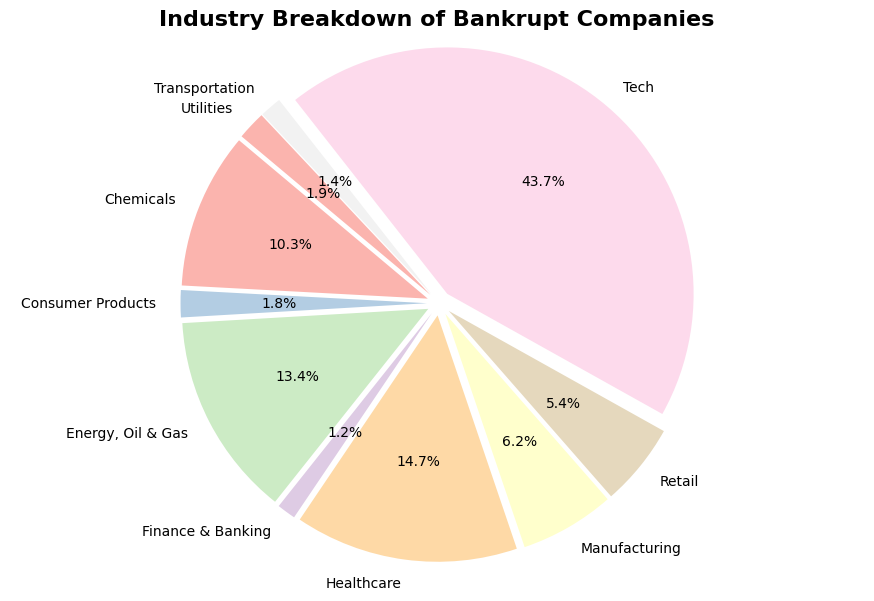

In [252]:
import matplotlib.pyplot as plt

# Calculate counts
industry_counts = unique_companies_by_industry  # yeh teri dataset ka naam hai

# Styling options
colors = plt.cm.Pastel1.colors  # smooth pastel palette
explode = [0.05] * len(industry_counts)  # thoda explode sab mein

# Plot
fig, ax = plt.subplots(figsize=(9, 6))  # Bigger figure size
wedges, texts, autotexts = ax.pie(
    industry_counts,
    labels=industry_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 10}
)

# Make it look good
ax.set_title('Industry Breakdown of Bankrupt Companies', fontsize=16, fontweight='bold')
ax.axis('equal')  # Equal aspect ratio

# Improve layout
plt.tight_layout()
plt.show()

In [34]:
# # Count null (NaN) values in each column
# null_counts = df.isnull().sum()
# # Show columns that have at least 1 null
# null_counts[null_counts > 0].sort_values(ascending=False)

,0
act,6036
lct,5902
ebit,5299
seq,5290
sale,5281
lt,5245
at,5239
prcc_f,637
csho,265
fyear,2


In [212]:
df.shape

(9196, 13)

In [36]:
# # Check year range across dataset
# print("Min year:", df['fyear'].min())
# print("Max year:", df['fyear'].max())

# # Or count how many years per ticker
# df.groupby('tic')['fyear'].nunique().sort_values(ascending=False)

Min year: 1950.0
Max year: 2024.0


,fyear
tic,
GAPTQ,61
MZIAQ,58
FJCC,57
PRETQ,51
LUB,49
...,...
NKEL,1
NTZO,1
NVDW,1


In [213]:
bankrupt_df = bankrupt_df.rename(columns={'dltt': 'lt'})

In [214]:
z_score_columns = ['act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt', 'prcc_f', 'csho']
# df_clean = df.dropna(subset=z_score_columns)

In [105]:
# # 1. Create a lookup of each company's final fiscal year
# last_fyear = bankrupt_df.set_index('tic')['last_fyear'].to_dict()

# # 2. Filter out years after bankruptcy
# df = bankrupt_df[bankrupt_df.apply(lambda row: row['fyear'] <= last_fyear.get(row['tic'], 9999), axis=1)]
# df

In [215]:
print(bankrupt_df.columns)

Index(['tic', 'fyear', 'act', 'lct', 'at', 'seq', 'ebit', 'sale', 'lt',
       'prcc_f', 'csho', 'sic', 'industry'],
      dtype='object')


In [216]:
#healthcare
healthcare_df = bankrupt_df[bankrupt_df['industry'] == 'Healthcare']

# Calculate individual Z-Score components
healthcare_df['X1'] = (healthcare_df['act'] - healthcare_df['lct']) / healthcare_df['at'] # Working Capital / Total Assets
healthcare_df['X2'] = healthcare_df['seq'] / healthcare_df['at']                          # Retained Earnings / Total Assets
healthcare_df['X3'] = healthcare_df['ebit'] / healthcare_df['at']                         # EBIT / Total Assets
healthcare_df['X4'] = (healthcare_df['prcc_f'] * healthcare_df['csho']) / healthcare_df['lt'] # Market Value of Equity / Total Liabilities
healthcare_df['X5'] = healthcare_df['sale'] / healthcare_df['at']                         # Sales / Total Assets
healthcare_df.head()


<ipython-input-216-a538d547d957>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_df['X1'] = (healthcare_df['act'] - healthcare_df['lct']) / healthcare_df['at'] # Working Capital / Total Assets
<ipython-input-216-a538d547d957>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_df['X2'] = healthcare_df['seq'] / healthcare_df['at']                          # Retained Earnings / Total Assets
<ipython-input-216-a538d547d957>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
460,AIDCA,1968,4.536,2.537,18.362,4.434,0.984,5.959,11.316,43.500,0.700,8062,Healthcare,0.108866,0.241477,0.053589,2.690880,0.324529
461,AIDCA,1969,13.852,5.098,43.042,19.912,2.134,10.411,17.829,31.500,1.621,8062,Healthcare,0.203383,0.462618,0.049579,2.863958,0.241880
462,AIDCA,1970,10.406,2.913,45.313,19.540,1.454,15.686,21.494,7.875,1.907,8062,Healthcare,0.165361,0.431223,0.032088,0.698689,0.346170
463,AIDCA,1971,18.569,9.927,66.631,24.352,2.304,29.520,31.796,7.000,2.250,8062,Healthcare,0.129699,0.365476,0.034578,0.495345,0.443037
464,AIDCA,1972,24.600,13.524,88.468,24.992,1.917,41.855,49.093,6.000,2.238,8062,Healthcare,0.125198,0.282498,0.021669,0.273522,0.473109


In [217]:
healthcare_df

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
460,AIDCA,1968,4.536,2.537,18.362,4.434,0.984,5.959,11.316,43.5000,0.700,8062,Healthcare,0.108866,0.241477,0.053589,2.690880,0.324529
461,AIDCA,1969,13.852,5.098,43.042,19.912,2.134,10.411,17.829,31.5000,1.621,8062,Healthcare,0.203383,0.462618,0.049579,2.863958,0.241880
462,AIDCA,1970,10.406,2.913,45.313,19.540,1.454,15.686,21.494,7.8750,1.907,8062,Healthcare,0.165361,0.431223,0.032088,0.698689,0.346170
463,AIDCA,1971,18.569,9.927,66.631,24.352,2.304,29.520,31.796,7.0000,2.250,8062,Healthcare,0.129699,0.365476,0.034578,0.495345,0.443037
464,AIDCA,1972,24.600,13.524,88.468,24.992,1.917,41.855,49.093,6.0000,2.238,8062,Healthcare,0.125198,0.282498,0.021669,0.273522,0.473109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328844,APTEF,2019,5.692,4.023,13.724,3.597,0.541,15.544,2.875,0.2528,38.785,3845,Healthcare,0.121612,0.262096,0.039420,3.410382,1.132614
328917,CALT,2020,122.055,12.433,177.335,142.496,-44.036,0.103,0.460,33.6200,24.971,2834,Healthcare,0.618163,0.803541,-0.248321,1825.054391,0.000581
328918,CALT,2021,112.009,14.980,161.461,111.512,-54.236,25.365,23.581,24.7600,26.171,2834,Healthcare,0.600944,0.690644,-0.335908,27.479495,0.157097
328919,CALT,2022,135.477,31.200,187.355,73.510,-38.540,77.023,69.919,17.0000,26.836,2834,Healthcare,0.556574,0.392357,-0.205706,6.524864,0.411107


In [218]:
healthcare_non_bankrupt

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
374,ABT,1963,102.300,42.965,178.900,123.013,34.938,158.648,55.887,123.999939,4.016,3845,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797
375,ABT,1964,116.100,45.346,209.400,151.605,43.830,212.586,57.795,47.000000,13.183,3845,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215
376,ABT,1965,116.700,48.850,223.700,162.675,45.340,236.800,61.025,47.499969,13.184,3845,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561
377,ABT,1966,128.800,54.185,249.400,179.648,49.086,265.804,69.752,46.000000,13.282,3845,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774
378,ABT,1967,143.100,60.096,288.900,195.297,52.279,303.341,93.603,47.000000,13.364,3845,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186145,QNRX,2022,13.370,3.528,14.458,7.407,-9.257,0.000,7.051,1.420000,4.847,2834,Healthcare,0.680730,0.512312,-0.640268,0.976137,0.000000
186146,QNRX,2023,11.286,3.581,12.169,5.664,-9.379,0.000,6.505,4.905000,0.987,2834,Healthcare,0.633166,0.465445,-0.770729,0.744233,0.000000
186147,QNRX,2024,14.926,4.181,15.709,9.205,-9.528,0.000,6.504,0.650700,8.948,2834,Healthcare,0.684003,0.585970,-0.606531,0.895213,0.000000
186163,HLN,2022,4890.689,5265.413,41948.594,19677.222,2913.448,13082.804,22119.555,8.000000,4617.287,2834,Healthcare,-0.008933,0.469079,0.069453,1.669938,0.311877


In [219]:
healthcare_non_bankrupt['tic'].nunique()

478

In [220]:
healthcare_df['tic'].nunique()

1155

The total number of healthcare companies for bankrupt and non-bankrupt has been 1155 and 478. As for the next steps, different modeling technique will be appied to extract the relevant z-score from the dataset  

#LDA on Healthcare Data

In [221]:
# Label data
healthcare_df['label'] = 1  # bankrupt
healthcare_non_bankrupt['label'] = 0  # non-bankrupt

# Combine both
healthcare_full_df = pd.concat([healthcare_df, healthcare_non_bankrupt], ignore_index=True)

<ipython-input-221-317692ef1886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_df['label'] = 1  # bankrupt
<ipython-input-221-317692ef1886>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare_non_bankrupt['label'] = 0  # non-bankrupt


In [131]:
import numpy as np

# STEP 1: Sample equal number of companies (e.g., 478)
n_companies = 478

bankrupt_companies = healthcare_df['tic'].unique()
non_bankrupt_companies = healthcare_non_bankrupt['tic'].unique()

np.random.seed(42)
# Change here: Select from unique company identifiers (tic) instead of the whole DataFrame
selected_bankrupt_tics = np.random.choice(bankrupt_companies, size=n_companies, replace=False)

sampled_non_bankrupt_df = healthcare_non_bankrupt.copy()
sampled_bankrupt_df = healthcare_df[healthcare_df['tic'].isin(selected_bankrupt_tics)]

balanced_company_df = pd.concat([sampled_bankrupt_df, sampled_non_bankrupt_df], ignore_index=True)

In [132]:
len(sampled_bankrupt_df['tic'].unique())

478

In [133]:
len(sampled_non_bankrupt_df['tic'].unique())

478

In [ ]:
balanced_company_df.drop(columns=['sic', 'datadate'])

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5,label
0,3CYGN,1991.0,23.997,3.421,32.186,27.341,-8.515,5.057,4.845,22.750,11.568,Healthcare,0.639284,0.849469,-0.264556,54.318266,0.157118,1
1,3CYGN,1992.0,43.404,11.917,52.667,36.153,-15.613,25.643,16.514,12.000,13.651,Healthcare,0.597851,0.686445,-0.296447,9.919583,0.486889,1
2,3CYGN,1993.0,38.153,14.109,46.861,26.243,-11.578,17.477,20.618,11.250,13.851,Healthcare,0.513092,0.560018,-0.247071,7.557656,0.372954,1
3,3CYGN,1994.0,30.642,12.601,38.594,18.117,-8.119,21.270,20.477,6.750,15.573,Healthcare,0.467456,0.469425,-0.210369,5.133455,0.551122,1
4,3CYGN,1995.0,49.826,11.271,57.854,38.252,-13.138,19.006,19.602,22.375,18.223,Healthcare,0.666419,0.661182,-0.227089,20.800920,0.328517,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,VREOF,2023.0,148.852,179.467,183.264,-16.043,10.579,88.133,199.307,0.240,143.126,Healthcare,-0.167054,-0.087540,0.057725,0.172348,0.480907,0
2173,VREOF,2024.0,230.371,135.467,278.863,55.565,18.067,99.384,223.298,0.560,366.050,Healthcare,0.340325,0.199256,0.064788,0.918002,0.356390,0
2174,SVRE,2022.0,9.513,1.928,9.793,7.552,-8.307,0.339,2.241,1.300,5.556,Healthcare,0.774533,0.771163,-0.848259,3.223025,0.034617,0
2175,SVRE,2023.0,6.722,4.111,7.495,2.936,-9.504,0.755,4.559,0.721,13.916,Healthcare,0.348366,0.391728,-1.268045,2.200798,0.100734,0


In [270]:
balanced_company_df_all = pd.concat([healthcare_df, healthcare_non_bankrupt], ignore_index=True)

In [271]:
balanced_company_df_all

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5,label
0,AIDCA,1968,4.536,2.537,18.362,4.434,0.984,5.959,11.316,43.5000,0.700,8062,Healthcare,0.108866,0.241477,0.053589,2.690880,0.324529,1
1,AIDCA,1969,13.852,5.098,43.042,19.912,2.134,10.411,17.829,31.5000,1.621,8062,Healthcare,0.203383,0.462618,0.049579,2.863958,0.241880,1
2,AIDCA,1970,10.406,2.913,45.313,19.540,1.454,15.686,21.494,7.8750,1.907,8062,Healthcare,0.165361,0.431223,0.032088,0.698689,0.346170,1
3,AIDCA,1971,18.569,9.927,66.631,24.352,2.304,29.520,31.796,7.0000,2.250,8062,Healthcare,0.129699,0.365476,0.034578,0.495345,0.443037,1
4,AIDCA,1972,24.600,13.524,88.468,24.992,1.917,41.855,49.093,6.0000,2.238,8062,Healthcare,0.125198,0.282498,0.021669,0.273522,0.473109,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,QNRX,2022,13.370,3.528,14.458,7.407,-9.257,0.000,7.051,1.4200,4.847,2834,Healthcare,0.680730,0.512312,-0.640268,0.976137,0.000000,0
17786,QNRX,2023,11.286,3.581,12.169,5.664,-9.379,0.000,6.505,4.9050,0.987,2834,Healthcare,0.633166,0.465445,-0.770729,0.744233,0.000000,0
17787,QNRX,2024,14.926,4.181,15.709,9.205,-9.528,0.000,6.504,0.6507,8.948,2834,Healthcare,0.684003,0.585970,-0.606531,0.895213,0.000000,0
17788,HLN,2022,4890.689,5265.413,41948.594,19677.222,2913.448,13082.804,22119.555,8.0000,4617.287,2834,Healthcare,-0.008933,0.469079,0.069453,1.669938,0.311877,0


In [268]:
balanced_company_df_all.isnull().sum()

,0
tic,0
fyear,0
act,0
lct,0
at,0
seq,0
ebit,0
sale,0
lt,0
prcc_f,0


#Run the LDA Model

Confusion Matrix:
 [[6206  143]
 [4710   87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.98      0.72      6349
           1       0.38      0.02      0.03      4797

    accuracy                           0.56     11146
   macro avg       0.47      0.50      0.38     11146
weighted avg       0.49      0.56      0.42     11146


Accuracy: 0.564597164902207


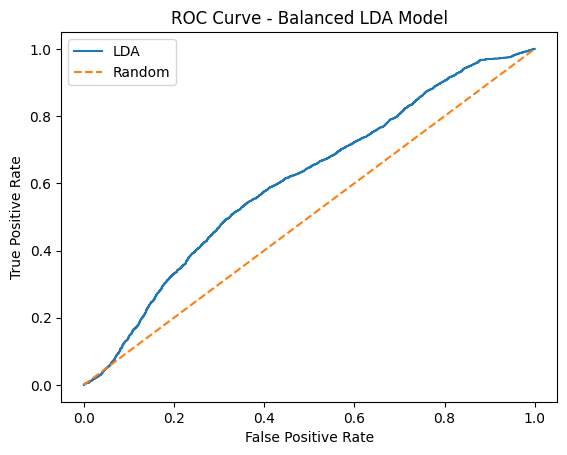

AUC Score: 0.6067369703586661


In [134]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Replace any unexpected values
X = balanced_company_df[['X1', 'X2', 'X3', 'X4', 'X5']].replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())
y = balanced_company_df['label'].astype(int)

# Step 2: Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)

# Step 4: Predict
y_pred = lda.predict(X_scaled)

# Step 5: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nAccuracy:", accuracy_score(y, y_pred))

# Step 6: AUC Curve
y_proba = lda.predict_proba(X_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label="LDA")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced LDA Model")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y, y_proba))

#Try equal numbers of rows

In [139]:
sampled_bankrupt_df.drop(columns='sic')

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5,label
3766,ALB.1,1966,5.027,1.735,8.053,6.263,1.794,11.576,0.055,27.000000,0.630,Healthcare,0.408792,0.777723,0.222774,309.272727,1.437477,1
3767,ALB.1,1967,6.570,2.341,10.769,7.328,2.140,15.748,1.100,45.000000,0.648,Healthcare,0.392701,0.680472,0.198719,26.509091,1.462346,1
3768,ALB.1,1968,7.954,2.775,13.611,9.336,2.744,20.195,1.500,67.999969,0.676,Healthcare,0.380501,0.685916,0.201602,30.645320,1.483726,1
3769,ALB.1,1969,13.875,5.298,26.555,11.698,3.232,24.586,9.440,36.999985,1.454,Healthcare,0.322990,0.440520,0.121710,5.698938,0.925852,1
3770,ALB.1,1970,17.728,5.687,32.100,25.142,4.738,30.740,1.202,54.999985,1.703,Healthcare,0.375109,0.783240,0.147601,77.924271,0.957632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328709,MZOR,2013,69.926,6.464,70.889,64.093,-6.929,19.983,0.000,19.520000,20.410,Healthcare,0.895231,0.904132,-0.097744,inf,0.281891,1
328710,MZOR,2014,53.719,6.141,60.686,54.267,-14.708,21.208,0.000,12.410000,21.067,Healthcare,0.784003,0.894226,-0.242362,inf,0.349471,1
328711,MZOR,2015,44.405,8.271,50.970,42.400,-15.307,26.096,0.000,10.160000,21.176,Healthcare,0.708927,0.831862,-0.300314,inf,0.511987,1
328712,MZOR,2016,67.484,17.511,82.725,64.889,-19.021,36.379,0.000,21.920000,23.810,Healthcare,0.604086,0.784394,-0.229930,inf,0.439758,1


In [140]:
sampled_non_bankrupt_df.drop(columns='sic')

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,industry,X1,X2,X3,X4,X5,label
374,ABT,1963,102.300,42.965,178.900,123.013,34.938,158.648,55.887,123.999939,4.016,Healthcare,0.331666,0.687608,0.195293,8.910547,0.886797,0
375,ABT,1964,116.100,45.346,209.400,151.605,43.830,212.586,57.795,47.000000,13.183,Healthcare,0.337889,0.723997,0.209312,10.720668,1.015215,0
376,ABT,1965,116.700,48.850,223.700,162.675,45.340,236.800,61.025,47.499969,13.184,Healthcare,0.303308,0.727202,0.202682,10.262017,1.058561,0
377,ABT,1966,128.800,54.185,249.400,179.648,49.086,265.804,69.752,46.000000,13.282,Healthcare,0.299178,0.720321,0.196816,8.759204,1.065774,0
378,ABT,1967,143.100,60.096,288.900,195.297,52.279,303.341,93.603,47.000000,13.364,Healthcare,0.287310,0.676002,0.180959,6.710340,1.049986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186145,QNRX,2022,13.370,3.528,14.458,7.407,-9.257,0.000,7.051,1.420000,4.847,Healthcare,0.680730,0.512312,-0.640268,0.976137,0.000000,0
186146,QNRX,2023,11.286,3.581,12.169,5.664,-9.379,0.000,6.505,4.905000,0.987,Healthcare,0.633166,0.465445,-0.770729,0.744233,0.000000,0
186147,QNRX,2024,14.926,4.181,15.709,9.205,-9.528,0.000,6.504,0.650700,8.948,Healthcare,0.684003,0.585970,-0.606531,0.895213,0.000000,0
186163,HLN,2022,4890.689,5265.413,41948.594,19677.222,2913.448,13082.804,22119.555,8.000000,4617.287,Healthcare,-0.008933,0.469079,0.069453,1.669938,0.311877,0


#Final Model


In [169]:
healthcare_df.shape

(11441, 19)

In [170]:
healthcare_non_bankrupt.shape

(6349, 19)

In [230]:
from collections import defaultdict

# Count how many rows each company has
bankrupt_counts = healthcare_df['tic'].value_counts()
non_bankrupt_counts = healthcare_non_bankrupt['tic'].value_counts()

# Helper: reverse dictionary to group by row count
def invert_counts(counts):
    grouped = defaultdict(list)
    for tic, count in counts.items():
        grouped[count].append(tic)
    return grouped

grouped_bankrupt = invert_counts(bankrupt_counts)
grouped_non_bankrupt = invert_counts(non_bankrupt_counts)

# Match row counts in both groups
matching_tics = []
for row_count in grouped_bankrupt:
    if row_count in grouped_non_bankrupt:
        n = min(len(grouped_bankrupt[row_count]), len(grouped_non_bankrupt[row_count]))
        b_subset = grouped_bankrupt[row_count][:n]
        nb_subset = grouped_non_bankrupt[row_count][:n]
        matching_tics.extend([(b, nb, row_count) for b, nb in zip(b_subset, nb_subset)])

In [231]:
# Create final matched datasets
bankrupt_final = healthcare_df[healthcare_df['tic'].isin([b for b, _, _ in matching_tics])]
non_bankrupt_final = healthcare_non_bankrupt[healthcare_non_bankrupt['tic'].isin([nb for _, nb, _ in matching_tics])]

# Combine into one balanced dataframe
balanced_company_df = pd.concat([bankrupt_final, non_bankrupt_final], ignore_index=True)
balanced_company_df = balanced_company_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [274]:
X = balanced_company_df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = balanced_company_df['label'].astype(int)

# Handle missing/infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-274-c4e06fe6a455>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-274-c4e06fe6a455>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


[[3639 1281]
 [2306 2614]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      4920
           1       0.67      0.53      0.59      4920

    accuracy                           0.64      9840
   macro avg       0.64      0.64      0.63      9840
weighted avg       0.64      0.64      0.63      9840

Accuracy: 0.6354674796747968
AUC Score: 0.6792639962984995


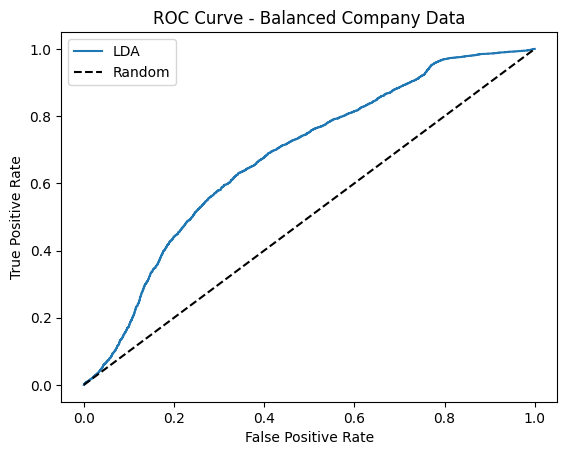

In [275]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)

# Predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = lda.predict(X_scaled)
y_proba = lda.predict_proba(X_scaled)[:, 1]

# Evaluation
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC Score:", roc_auc_score(y, y_proba))

# ROC Plot
fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label='LDA')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Company Data")
plt.legend()
plt.show()

In [234]:
lda_weights = pd.Series(lda.coef_[0], index=X.columns)
print("📊 Altman-style LDA Z-Score Weights:")
print(lda_weights.sort_values(ascending=False))

📊 Altman-style LDA Z-Score Weights:
X2    0.140466
X5    0.121032
X4    0.075092
X3    0.055419
X1   -0.140792
dtype: float64


In [235]:
# Step 1: Get the probabilities for the balanced dataset
balanced_company_df['lda_probability'] = lda.predict_proba(X_scaled)[:, 1]

# Step 2: If needed, merge probabilities back to the original 'df'
# This step depends on your needs and how 'balanced_company_df' relates to 'df'
# One way could be using 'merge'
# df = pd.merge(df, balanced_company_df[['tic', 'fyear', 'lda_probability']], on=['tic', 'fyear'], how='left')

# Step 3: Now calculate percentiles on balanced_company_df
q25 = balanced_company_df['lda_probability'].quantile(0.25)
q50 = balanced_company_df['lda_probability'].quantile(0.50)
q75 = balanced_company_df['lda_probability'].quantile(0.75)

print("Thresholds based on data:")
print(f"🔴 Very High Risk: < {q25:.2f}")
print(f"🟧 High Risk: {q25:.2f} – {q50:.2f}")
print(f"🟨 Medium Risk: {q50:.2f} – {q75:.2f}")
print(f"🟩 Very Low Risk: > {q75:.2f}")

Thresholds based on data:
🔴 Very High Risk: < 0.49
🟧 High Risk: 0.49 – 0.50
🟨 Medium Risk: 0.50 – 0.50
🟩 Very Low Risk: > 0.50


In [236]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
y_proba = lda.predict_proba(X_scaled)[:, 1]

# Compute FPR, TPR, Thresholds
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Find the threshold where (TPR - FPR) is maximized (Youden's J)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"📌 Best Threshold (Youden’s J): {best_threshold:.4f}")

📌 Best Threshold (Youden’s J): 0.4983


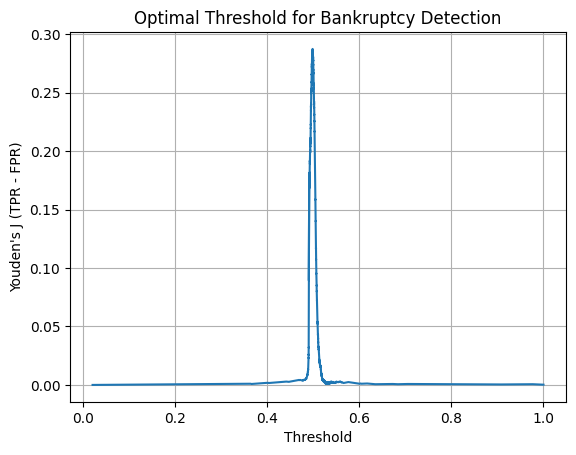

In [237]:
import matplotlib.pyplot as plt

plt.plot(thresholds, tpr - fpr)
plt.xlabel("Threshold")
plt.ylabel("Youden's J (TPR - FPR)")
plt.title("Optimal Threshold for Bankruptcy Detection")
plt.grid(True)
plt.show()

In [ ]:
# # Use Youden threshold for strict flag
# df['is_bankrupt_pred'] = (df['lda_probability'] < 0.5207).astype(int)

# # Use quantiles for colorful dashboards
# df['risk_zone'] = df['lda_probability'].apply(risk_zone_function)

#Companies check

In [243]:
# Get list of all tics used in training
used_tics = bankrupt_final['tic'].unique()

# Filter companies NOT used during training
unseen_company_df = healthcare_df[~healthcare_df['tic'].isin(used_tics)]

# Randomly pick one company
demo_tic = unseen_company_df['tic'].unique()[0]
demo_data = unseen_company_df[unseen_company_df['tic'] == demo_tic].copy()

print(f"📌 Picked unseen company: {demo_tic}")
display(demo_data.head())

📌 Picked unseen company: AIDCA


,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5,label
460,AIDCA,1968,4.536,2.537,18.362,4.434,0.984,5.959,11.316,43.500,0.700,8062,Healthcare,0.108866,0.241477,0.053589,2.690880,0.324529,1
461,AIDCA,1969,13.852,5.098,43.042,19.912,2.134,10.411,17.829,31.500,1.621,8062,Healthcare,0.203383,0.462618,0.049579,2.863958,0.241880,1
462,AIDCA,1970,10.406,2.913,45.313,19.540,1.454,15.686,21.494,7.875,1.907,8062,Healthcare,0.165361,0.431223,0.032088,0.698689,0.346170,1
463,AIDCA,1971,18.569,9.927,66.631,24.352,2.304,29.520,31.796,7.000,2.250,8062,Healthcare,0.129699,0.365476,0.034578,0.495345,0.443037,1
464,AIDCA,1972,24.600,13.524,88.468,24.992,1.917,41.855,49.093,6.000,2.238,8062,Healthcare,0.125198,0.282498,0.021669,0.273522,0.473109,1


In [244]:
# Select features and clean
X_demo = demo_data[['X1', 'X2', 'X3', 'X4', 'X5']]
X_demo.replace([np.inf, -np.inf], np.nan, inplace=True)
X_demo.fillna(X_demo.mean(), inplace=True)

# Scale using your trained scaler
X_demo_scaled = scaler.transform(X_demo)

<ipython-input-244-fbfadd1378e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_demo.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-244-fbfadd1378e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_demo.fillna(X_demo.mean(), inplace=True)


In [245]:
# Get LDA weights from trained model
lda_weights = pd.Series(lda.coef_[0], index=X.columns)

# Multiply weights with scaled features to get Z-score for each row
z_scores = np.dot(X_demo_scaled, lda_weights.values)

# Attach to data
demo_data['lda_z_score'] = z_scores

display(demo_data[['tic', 'fyear', 'lda_z_score']].head())

,tic,fyear,lda_z_score
460,AIDCA,1968,-0.023370
461,AIDCA,1969,-0.027183
462,AIDCA,1970,-0.022341
463,AIDCA,1971,-0.017829
464,AIDCA,1972,-0.016465


In [246]:
# Example thresholds (replace with yours if calculated differently)
if z_scores[0] < 0.49:
    risk = "🔴 Very High Risk"
elif z_scores[0] < 0.50:
    risk = "🟠 High Risk"
elif z_scores[0] <= 0.50:
    risk = "🟡 Medium Risk"
else:
    risk = "🟢 Very Low Risk"

print(f"🧾 Company {demo_tic} → Z-Score: {z_scores[0]:.2f} → {risk}")

🧾 Company AIDCA → Z-Score: -0.02 → 🔴 Very High Risk


In [251]:
# Step 1: Identify unused bankrupt companies
used_tics = sampled_bankrupt_df['tic'].unique()
unseen_bankrupt_df = healthcare_df[~healthcare_df['tic'].isin(used_tics)]

# Step 2: Pick a random tic from unseen companies
unseen_tics = unseen_bankrupt_df['tic'].unique()
chosen_tic = np.random.choice(unseen_tics)
print("📌 Chosen unseen company:", chosen_tic)

# Step 3: Fetch all rows (years) for this company
company_history = unseen_bankrupt_df[unseen_bankrupt_df['tic'] == chosen_tic].copy()
company_history = company_history.sort_values(by='fyear')

# Step 4: Preprocess
X_test = company_history[['X1', 'X2', 'X3', 'X4', 'X5']].replace([np.inf, -np.inf], np.nan)
X_test.fillna(X_test.mean(), inplace=True)

# Step 5: Scale using original scaler
X_test_scaled = scaler.transform(X_test)

# Step 6: Predict bankruptcy probabilities
company_history['lda_probability'] = lda.predict_proba(X_test_scaled)[:, 1]

# Step 7: Assign risk zone
company_history['risk_zone'] = pd.cut(company_history['lda_probability'],
                                      bins=[-np.inf, q25, q50, q75, np.inf],
                                      labels=['🔴 Very High Risk', '🟧 High Risk', '🟨 Medium Risk', '🟩 Very Low Risk'])

# Step 8: Display result
display(company_history[['tic', 'fyear', 'lda_probability', 'risk_zone']])

📌 Chosen unseen company: 3CYBR


,tic,fyear,lda_probability,risk_zone
232442,3CYBR,1992,0.495650,🟧 High Risk
232443,3CYBR,1993,0.494954,🟧 High Risk
232444,3CYBR,1994,0.501746,🟨 Medium Risk
232445,3CYBR,1995,0.498682,🟨 Medium Risk
232446,3CYBR,1996,0.492910,🔴 Very High Risk
232447,3CYBR,1997,0.492905,🔴 Very High Risk
232448,3CYBR,1998,0.496326,🟧 High Risk
232449,3CYBR,1999,0.496394,🟧 High Risk
232450,3CYBR,2000,0.494100,🟧 High Risk
232451,3CYBR,2001,0.497036,🟧 High Risk


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


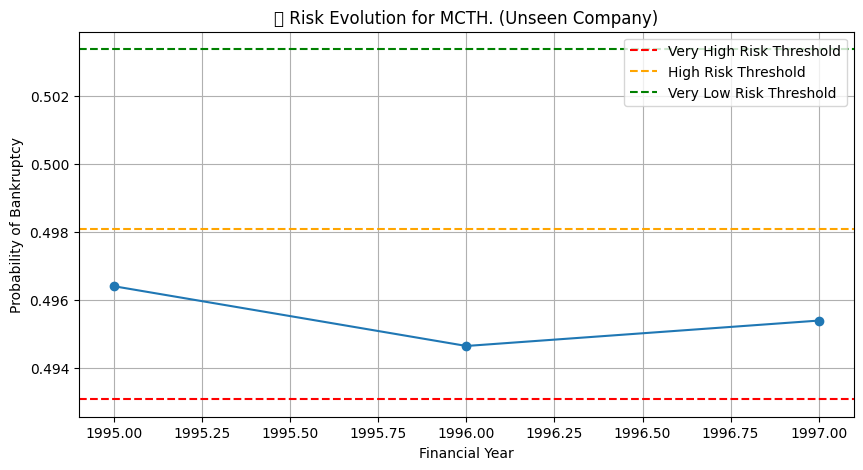

In [250]:
plt.figure(figsize=(10, 5))
plt.plot(company_history['fyear'], company_history['lda_probability'], marker='o')
plt.axhline(y=q25, color='red', linestyle='--', label='Very High Risk Threshold')
plt.axhline(y=q50, color='orange', linestyle='--', label='High Risk Threshold')
plt.axhline(y=q75, color='green', linestyle='--', label='Very Low Risk Threshold')
plt.title(f'📊 Risk Evolution for {chosen_tic} (Unseen Company)')
plt.xlabel("Financial Year")
plt.ylabel("Probability of Bankruptcy")
plt.legend()
plt.grid(True)
plt.show()

#Tech Companies

In [254]:
#Tech
tech_df = bankrupt_df[bankrupt_df['industry'] == 'Tech']

# Calculate individual Z-Score components
tech_df['X1'] = (tech_df['act'] - tech_df['lct']) / tech_df['at'] # Working Capital / Total Assets
tech_df['X2'] = tech_df['seq'] / tech_df['at']                          # Retained Earnings / Total Assets
tech_df['X3'] = tech_df['ebit'] / tech_df['at']                         # EBIT / Total Assets
tech_df['X4'] = (tech_df['prcc_f'] * tech_df['csho']) /tech_df['lt'] # Market Value of Equity / Total Liabilities
tech_df['X5'] = tech_df['sale'] / tech_df['at']                         # Sales / Total Assets
tech_df.head()


<ipython-input-254-f988e5b86971>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['X1'] = (tech_df['act'] - tech_df['lct']) / tech_df['at'] # Working Capital / Total Assets
<ipython-input-254-f988e5b86971>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['X2'] = tech_df['seq'] / tech_df['at']                          # Retained Earnings / Total Assets
<ipython-input-254-f988e5b86971>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
71,4135B,1979,4.973,3.699,7.554,3.155,-0.494,8.106,0.0,1.75,1.251,3652,Tech,0.168652,0.417660,-0.065396,inf,1.073074
72,4135B,1980,5.296,3.548,7.199,2.973,-0.281,9.262,0.0,1.75,1.164,3652,Tech,0.242812,0.412974,-0.039033,inf,1.286568
73,4135B,1981,3.091,3.034,5.271,1.891,-1.697,7.261,0.0,0.75,1.138,3652,Tech,0.010814,0.358755,-0.321950,inf,1.377537
74,4135B,1982,2.832,2.914,4.877,1.896,-0.015,4.993,0.0,0.50,1.130,3652,Tech,-0.016814,0.388764,-0.003076,inf,1.023785
75,4135B,1983,2.075,3.113,3.974,0.833,-1.158,3.839,0.0,0.50,1.121,3652,Tech,-0.261198,0.209612,-0.291394,inf,0.966029


In [257]:
#Tech
tech_non_bankrupt_df = non_bankrupt_df[non_bankrupt_df['industry'] == 'Tech']

# Calculate individual Z-Score components
tech_non_bankrupt_df['X1'] = (tech_non_bankrupt_df['act'] - tech_non_bankrupt_df['lct']) / tech_non_bankrupt_df['at'] # Working Capital / Total Assets
tech_non_bankrupt_df['X2'] = tech_non_bankrupt_df['seq'] / tech_non_bankrupt_df['at']                          # Retained Earnings / Total Assets
tech_non_bankrupt_df['X3'] = tech_non_bankrupt_df['ebit'] / tech_non_bankrupt_df['at']                         # EBIT / Total Assets
tech_non_bankrupt_df['X4'] = (tech_non_bankrupt_df['prcc_f'] * tech_non_bankrupt_df['csho']) / tech_non_bankrupt_df['lt'] # Market Value of Equity / Total Liabilities
tech_non_bankrupt_df['X5'] = tech_non_bankrupt_df['sale'] / tech_non_bankrupt_df['at']                         # Sales / Total Assets
tech_non_bankrupt_df.head()


<ipython-input-257-26e44ada66ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_non_bankrupt_df['X1'] = (tech_non_bankrupt_df['act'] - tech_non_bankrupt_df['lct']) / tech_non_bankrupt_df['at'] # Working Capital / Total Assets
<ipython-input-257-26e44ada66ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_non_bankrupt_df['X2'] = tech_non_bankrupt_df['seq'] / tech_non_bankrupt_df['at']                          # Retained Earnings / Total Assets
<ipython-input-257-26e44ada66ae>:7: SettingWithCopy

,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5
443,WDDD,1981,0.151,0.003,0.151,0.148,0.013,0.015,0.003,1.000,0.908,7370,Tech,0.980132,0.980132,0.086093,302.666667,0.099338
444,WDDD,1982,0.167,0.003,0.167,0.164,0.016,0.019,0.003,0.625,0.908,7370,Tech,0.982036,0.982036,0.095808,189.166667,0.113772
445,WDDD,1983,0.196,0.004,0.196,0.192,0.029,0.031,0.004,0.125,0.908,7370,Tech,0.979592,0.979592,0.147959,28.375000,0.158163
460,WDDD,1998,1.694,1.013,1.908,-0.980,-3.644,0.029,2.888,1.031,17.919,7370,Tech,0.356918,-0.513627,-1.909853,6.396984,0.015199
461,WDDD,1999,2.295,3.736,4.781,0.978,-3.240,0.507,3.803,2.688,17.739,7370,Tech,-0.301401,0.204560,-0.677682,12.538110,0.106045


In [277]:
# Label data
tech_df['label'] = 1  # bankrupt
tech_non_bankrupt_df['label'] = 0  # non-bankrupt

<ipython-input-277-88b549585be4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['label'] = 1  # bankrupt
<ipython-input-277-88b549585be4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_non_bankrupt_df['label'] = 0  # non-bankrupt


In [278]:
tech_df['tic'].nunique()

3442

In [279]:
tech_non_bankrupt_df['tic'].nunique()

945

In [280]:
from collections import defaultdict

# Step 1: Count how many rows each Tech company has
bankrupt_counts_tech = tech_df['tic'].value_counts()
non_bankrupt_counts_tech = tech_non_bankrupt_df['tic'].value_counts()

# Step 2: Reverse dictionary to group tics by row count
def invert_counts(counts):
    grouped = defaultdict(list)
    for tic, count in counts.items():
        grouped[count].append(tic)
    return grouped

grouped_bankrupt_tech = invert_counts(bankrupt_counts_tech)
grouped_non_bankrupt_tech = invert_counts(non_bankrupt_counts_tech)

# Step 3: Match row counts in both groups
tech_matching_tics = []
for row_count in grouped_bankrupt_tech:
    if row_count in grouped_non_bankrupt_tech:
        n = min(len(grouped_bankrupt_tech[row_count]), len(grouped_non_bankrupt_tech[row_count]))
        b_subset = grouped_bankrupt_tech[row_count][:n]
        nb_subset = grouped_non_bankrupt_tech[row_count][:n]
        tech_matching_tics.extend([(b, nb, row_count) for b, nb in zip(b_subset, nb_subset)])

In [281]:
# Step: Create final matched datasets from tech
tech_bankrupt_final = tech_df[tech_df['tic'].isin([b for b, _, _ in tech_matching_tics])]
tech_non_bankrupt_final = tech_non_bankrupt_df[tech_non_bankrupt_df['tic'].isin([nb for _, nb, _ in tech_matching_tics])]

# Step: Combine into one balanced dataframe
balanced_tech_df = pd.concat([tech_bankrupt_final, tech_non_bankrupt_final], ignore_index=True)

# Step: Shuffle the rows to mix bankrupt and non-bankrupt companies randomly
balanced_tech_df = balanced_tech_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [282]:
X = balanced_tech_df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = balanced_tech_df['label'].astype(int)

# Clean data
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-282-8bd74c4f168c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-282-8bd74c4f168c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [283]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)

LinearDiscriminantAnalysis()

[[8003 2483]
 [5253 5233]]
              precision    recall  f1-score   support

           0       0.60      0.76      0.67     10486
           1       0.68      0.50      0.57     10486

    accuracy                           0.63     20972
   macro avg       0.64      0.63      0.62     20972
weighted avg       0.64      0.63      0.62     20972

Accuracy: 0.631127217242037
AUC Score: 0.6872182173344739


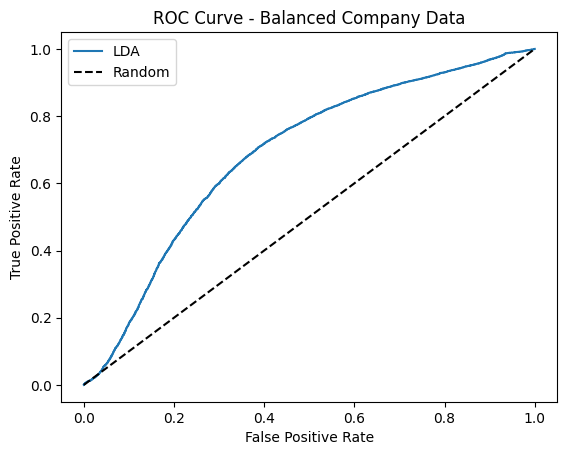

In [284]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = lda.predict(X_scaled)
y_proba = lda.predict_proba(X_scaled)[:, 1]

# Metrics
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC Score:", roc_auc_score(y, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label='LDA')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Company Data")
plt.legend()
plt.show()

In [285]:
lda_weights = pd.Series(lda.coef_[0], index=X.columns)
print("📊 Altman-style LDA Z-Score Weights:")
print(lda_weights.sort_values(ascending=False))

📊 Altman-style LDA Z-Score Weights:
X2    0.538634
X5    0.172948
X4    0.119705
X3    0.043953
X1   -0.461234
dtype: float64


In [287]:
# Step 1: Get the probabilities for the balanced dataset
balanced_tech_df['lda_probability'] = lda.predict_proba(X_scaled)[:, 1]

# Step 2: If needed, merge probabilities back to the original 'df'
# This step depends on your needs and how 'balanced_company_df' relates to 'df'
# One way could be using 'merge'
# df = pd.merge(df, balanced_company_df[['tic', 'fyear', 'lda_probability']], on=['tic', 'fyear'], how='left')

# Step 3: Now calculate percentiles on balanced_company_df
q25 = balanced_company_df['lda_probability'].quantile(0.25)
q50 = balanced_company_df['lda_probability'].quantile(0.50)
q75 = balanced_company_df['lda_probability'].quantile(0.75)

print("Thresholds based on data:")
print(f"🔴 Very High Risk: < {q25:.2f}")
print(f"🟧 High Risk: {q25:.2f} – {q50:.2f}")
print(f"🟨 Medium Risk: {q50:.2f} – {q75:.2f}")
print(f"🟩 Very Low Risk: > {q75:.2f}")

Thresholds based on data:
🔴 Very High Risk: < 0.49
🟧 High Risk: 0.49 – 0.50
🟨 Medium Risk: 0.50 – 0.50
🟩 Very Low Risk: > 0.50


In [288]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
y_proba = lda.predict_proba(X_scaled)[:, 1]

# Compute FPR, TPR, Thresholds
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Find the threshold where (TPR - FPR) is maximized (Youden's J)
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"📌 Best Threshold (Youden’s J): {best_threshold:.4f}")

📌 Best Threshold (Youden’s J): 0.4924


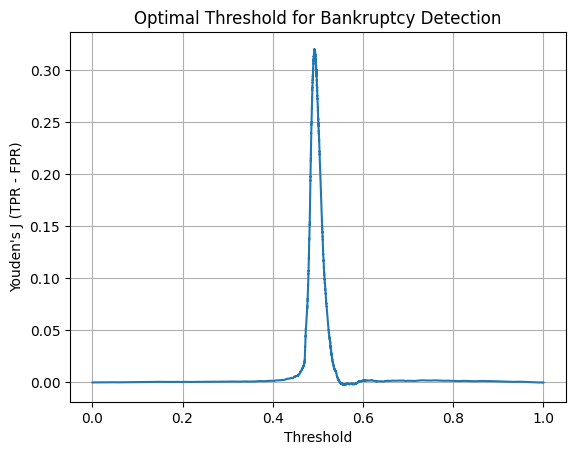

In [289]:
import matplotlib.pyplot as plt

plt.plot(thresholds, tpr - fpr)
plt.xlabel("Threshold")
plt.ylabel("Youden's J (TPR - FPR)")
plt.title("Optimal Threshold for Bankruptcy Detection")
plt.grid(True)
plt.show()

#Tech Company Check

In [291]:
# Get list of all tics used in training
used_tics = tech_bankrupt_final['tic'].unique()

# Filter companies NOT used during training
unseen_company_df = tech_df[~tech_df['tic'].isin(used_tics)]

# Randomly pick one company
demo_tic = unseen_company_df['tic'].unique()[0]
demo_data = unseen_company_df[unseen_company_df['tic'] == demo_tic].copy()

print(f"📌 Picked unseen company: {demo_tic}")
display(demo_data.head())

📌 Picked unseen company: ABMC.


,tic,fyear,act,lct,at,seq,ebit,sale,lt,prcc_f,csho,sic,industry,X1,X2,X3,X4,X5,label
78,ABMC.,1983,1.267,0.703,1.540,0.778,-0.943,0.570,0.059,2.125,2.459,3577,Tech,0.366234,0.505195,-0.612338,88.565678,0.370130,1
79,ABMC.,1984,0.750,0.431,0.973,0.384,-0.560,1.531,0.158,0.531,3.234,3577,Tech,0.327852,0.394656,-0.575540,10.868695,1.573484,1
80,ABMC.,1985,0.821,0.307,0.965,0.636,-0.876,0.705,0.022,1.375,11.410,3577,Tech,0.532642,0.659067,-0.907772,713.125000,0.730570,1


In [292]:
# Example thresholds (replace with yours if calculated differently)
if z_scores[0] < 0.49:
    risk = "🔴 Very High Risk"
elif z_scores[0] < 0.50:
    risk = "🟠 High Risk"
elif z_scores[0] <= 0.50:
    risk = "🟡 Medium Risk"
else:
    risk = "🟢 Very Low Risk"

print(f"🧾 Company {demo_tic} → Z-Score: {z_scores[0]:.2f} → {risk}")

🧾 Company ABMC. → Z-Score: -0.02 → 🔴 Very High Risk


In [293]:
# Step 1: Identify unused bankrupt companies
used_tics_tech = tech_df['tic'].unique()
unseen_bankrupt_df_tech = tech_df[~tech_df['tic'].isin(used_tics)]

# Step 2: Pick a random tic from unseen companies
unseen_tics_tech = unseen_bankrupt_df_tech['tic'].unique()
chosen_tic = np.random.choice(unseen_tics_tech)
print("📌 Chosen unseen company:", chosen_tic)

# Step 3: Fetch all rows (years) for this company
company_history = unseen_bankrupt_df_tech[unseen_bankrupt_df_tech['tic'] == chosen_tic].copy()
company_history = company_history.sort_values(by='fyear')

# Step 4: Preprocess
X_test = company_history[['X1', 'X2', 'X3', 'X4', 'X5']].replace([np.inf, -np.inf], np.nan)
X_test.fillna(X_test.mean(), inplace=True)

# Step 5: Scale using original scaler
X_test_scaled = scaler.transform(X_test)

# Step 6: Predict bankruptcy probabilities
company_history['lda_probability'] = lda.predict_proba(X_test_scaled)[:, 1]

# Step 7: Assign risk zone
company_history['risk_zone'] = pd.cut(company_history['lda_probability'],
                                      bins=[-np.inf, q25, q50, q75, np.inf],
                                      labels=['🔴 Very High Risk', '🟧 High Risk', '🟨 Medium Risk', '🟩 Very Low Risk'])

# Step 8: Display result
display(company_history[['tic', 'fyear', 'lda_probability', 'risk_zone']])

📌 Chosen unseen company: PRGN.1


,tic,fyear,lda_probability,risk_zone
275745,PRGN.1,1997,0.493498,🟧 High Risk
275748,PRGN.1,2000,0.479537,🔴 Very High Risk
275749,PRGN.1,2001,0.494123,🟧 High Risk
275750,PRGN.1,2002,0.486292,🔴 Very High Risk
275751,PRGN.1,2003,0.481514,🔴 Very High Risk
275752,PRGN.1,2004,0.483754,🔴 Very High Risk


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


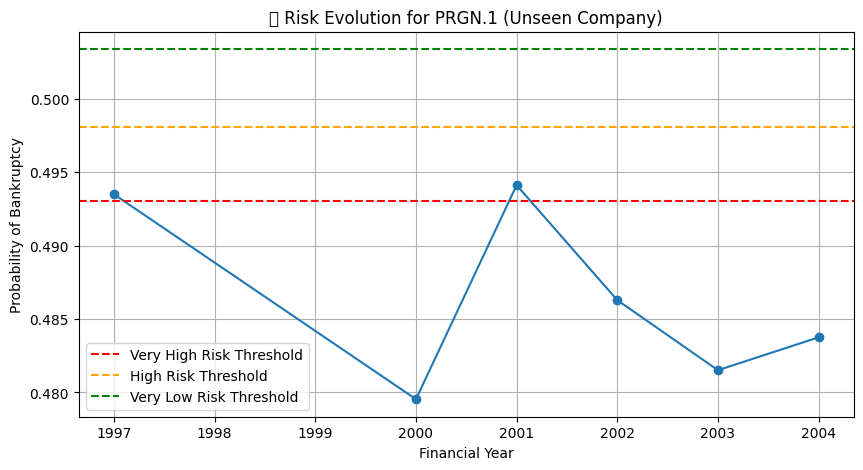

In [294]:
plt.figure(figsize=(10, 5))
plt.plot(company_history['fyear'], company_history['lda_probability'], marker='o')
plt.axhline(y=q25, color='red', linestyle='--', label='Very High Risk Threshold')
plt.axhline(y=q50, color='orange', linestyle='--', label='High Risk Threshold')
plt.axhline(y=q75, color='green', linestyle='--', label='Very Low Risk Threshold')
plt.title(f'📊 Risk Evolution for {chosen_tic} (Unseen Company)')
plt.xlabel("Financial Year")
plt.ylabel("Probability of Bankruptcy")
plt.legend()
plt.grid(True)
plt.show()

#Upload on Streamlit

In [296]:
!mkdir bankruptcy_app
%cd bankruptcy_app
!touch app.py

/content/bankruptcy_app


In [300]:
import pandas as pd

# ✅ Combine all 4 dataframes into one
combined_df = pd.concat([healthcare_df, healthcare_non_bankrupt, tech_df, tech_non_bankrupt_df], ignore_index=True)

# ✅ Only keep required columns for Streamlit model input
columns_needed = ['tic', 'fyear', 'X1', 'X2', 'X3', 'X4', 'X5']
streamlit_input_df = combined_df[columns_needed].dropna()

# ✅ Save to CSV
streamlit_input_df.to_csv('bankruptcy_test_companies.csv', index=False)

# ✅ Show sample
streamlit_input_df.head()

,tic,fyear,X1,X2,X3,X4,X5
0,AIDCA,1968,0.108866,0.241477,0.053589,2.690880,0.324529
1,AIDCA,1969,0.203383,0.462618,0.049579,2.863958,0.241880
2,AIDCA,1970,0.165361,0.431223,0.032088,0.698689,0.346170
3,AIDCA,1971,0.129699,0.365476,0.034578,0.495345,0.443037
4,AIDCA,1972,0.125198,0.282498,0.021669,0.273522,0.473109


In [301]:
from google.colab import files
files.download('bankruptcy_test_companies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [298]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load('lda_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🧠 Bankruptcy Risk Predictor")

uploaded_file = st.file_uploader("📄 Upload a CSV file", type=['csv'])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    st.write("### Input Data Preview", df.head())

    # Extract only the X1 to X5 columns
    X = df[['X1', 'X2', 'X3', 'X4', 'X5']]
    X_scaled = scaler.transform(X)

    # Predict
    probs = model.predict_proba(X_scaled)[:, 1]
    df['lda_probability'] = probs

    # Risk classification thresholds (from your model)
    q25, q50, q75 = 0.49, 0.50, 0.51

    def classify(prob):
        if prob < q25:
            return "🔴 Very High Risk"
        elif prob < q50:
            return "🟧 High Risk"
        elif prob < q75:
            return "🟨 Medium Risk"
        else:
            return "🟩 Very Low Risk"

    df['risk_zone'] = df['lda_probability'].apply(classify)

    st.write("### 🧾 Bankruptcy Risk Results")
    st.dataframe(df[['tic', 'fyear', 'lda_probability', 'risk_zone']])

Overwriting app.py


In [303]:
import joblib
joblib.dump(lda, "lda_model.pkl")

['lda_model.pkl']

In [304]:
from google.colab import files
files.download("lda_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [305]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [306]:
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [309]:
with open("requirements.txt", "w") as f:
    f.write("streamlit\npandas\nscikit-learn\njoblib\n")

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>